In [16]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

l = 0.5

In [17]:
#exponential distribution without normalisation constant
def prob(x):
    if x > 0:
        return np.exp(-l * x)
    else:
        return 0

In [18]:
#propose next state of chain
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, high=x + 0.5 * stepsize)

In [19]:
#acceptance probability of Metropolis-Hastings
def p_acc(x_new, x, prob):
    return min(1, prob(x_new)/prob(x))

In [20]:
#with p_acc we go to the next state, otherwise stay in current state
def sample(x, prob, stepsize):
    x_new = proposal(x, stepsize)
    accept = np.random.random() < p_acc(x_new, x, prob)
    if accept:
        return accept, x_new
    else:
        return accept, x

In [21]:
def build_chain(init, stepsize, n_total, prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample(chain[-1], prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

In [22]:
chain, acceptance_rate = build_chain(2.0, 3.0, 10000, prob)

print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state) 
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.694
Last ten states of chain: 2.67862, 3.73117, 4.32840, 4.78457, 4.22530, 3.49630, 4.83056, 3.56008, 3.07585, 1.70669


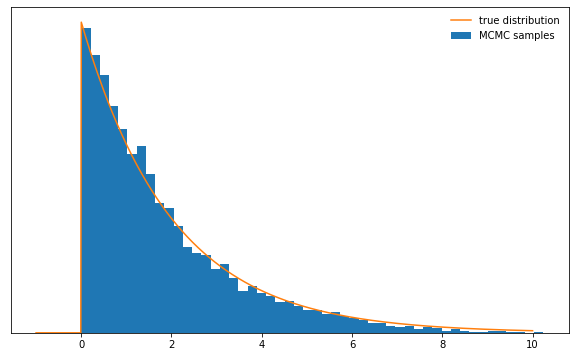

In [23]:
def plot_samples(chain, prob, ax, orientation='vertical', normalize=True,
                 xlims=(-1, 10), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [l * prob(x) for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)
    
fig, ax = plt.subplots()
plot_samples(chain[500:], prob, ax)
ax.set_yticks(())
plt.show()